In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from statistics import mean, stdev
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_validate, StratifiedKFold
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('hmeq.csv')
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [158]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [160]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [162]:
print(df["JOB"].value_counts())

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


In [163]:
print(df["REASON"].value_counts())

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64


In [3]:
df["REASON"] = df["REASON"].fillna("DebtCon")
print(df["REASON"].unique())

['HomeImp' 'DebtCon']


In [4]:
df["JOB"] = df["JOB"].fillna(df["JOB"].mode()[0])  #most frequent value in JOb column is Other
print(df["JOB"].unique())

['Other' 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']


<Axes: ylabel='Frequency'>

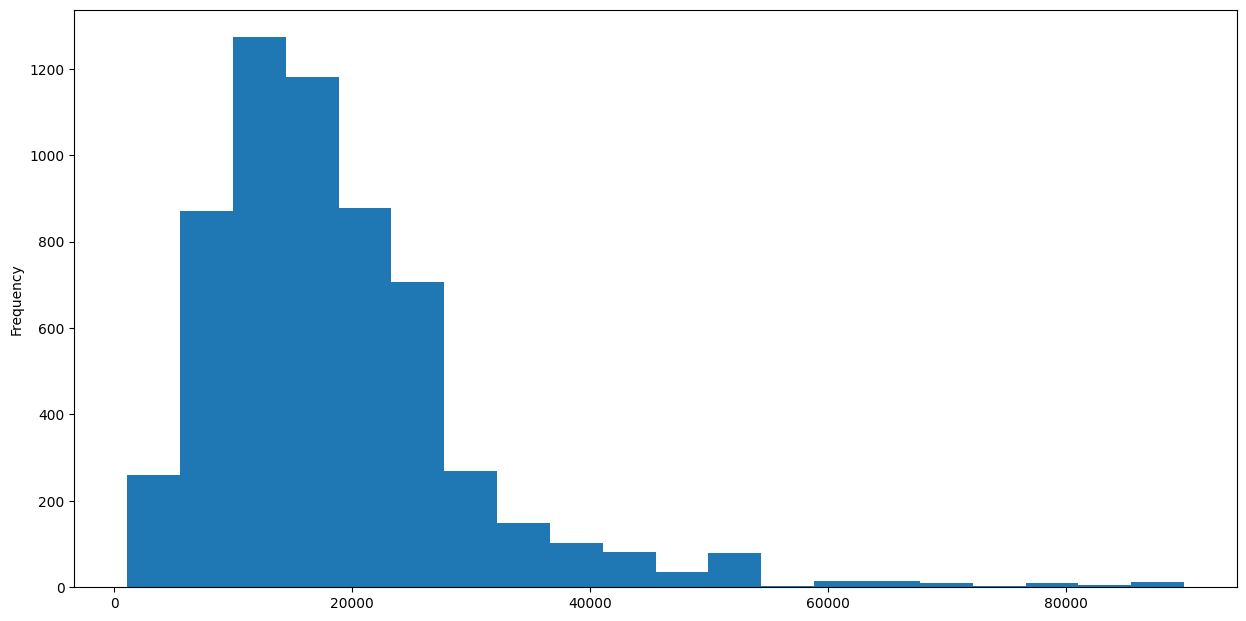

In [166]:
df["LOAN"].plot.hist(bins = 20,figsize=(15,7.5))

# distribution of loan variable
# density between 10000-30000 is high

<Axes: ylabel='Frequency'>

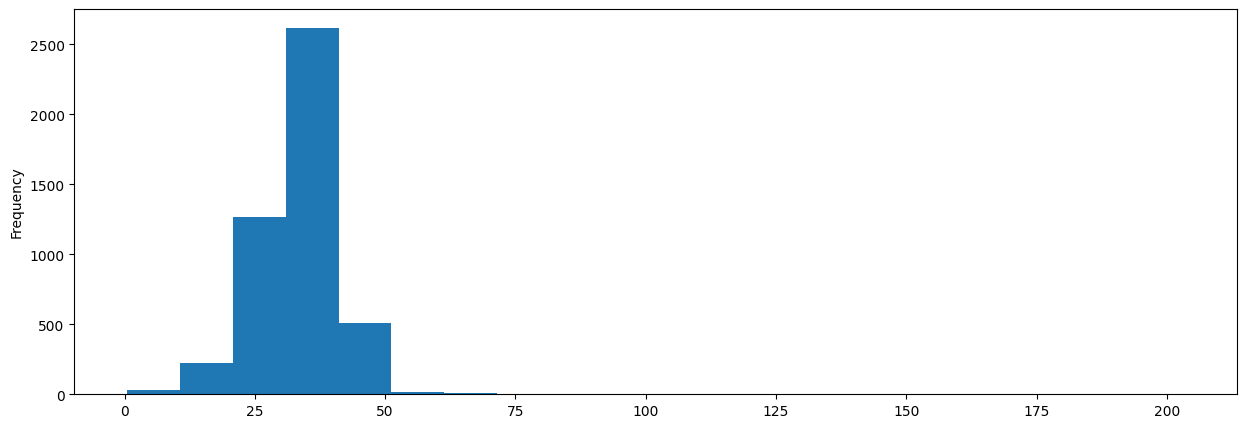

In [167]:
df["DEBTINC"].plot.hist(bins = 20,figsize=(15,5))

# Highly populated around 25-50
# We may cap off the end values if required.

<Axes: ylabel='Frequency'>

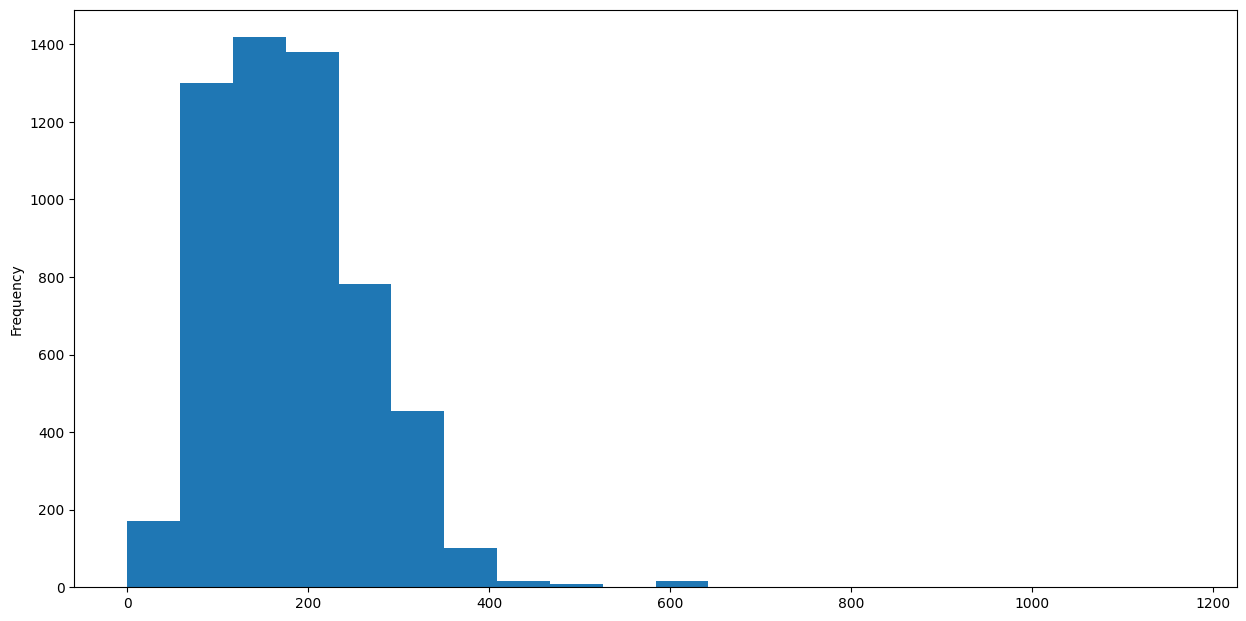

In [168]:
df["CLAGE"].plot.hist(bins = 20,figsize=(15,7.5))

# Density is high around 100-300
# We can cap off the values >= 600 to get better results

<Axes: ylabel='Frequency'>

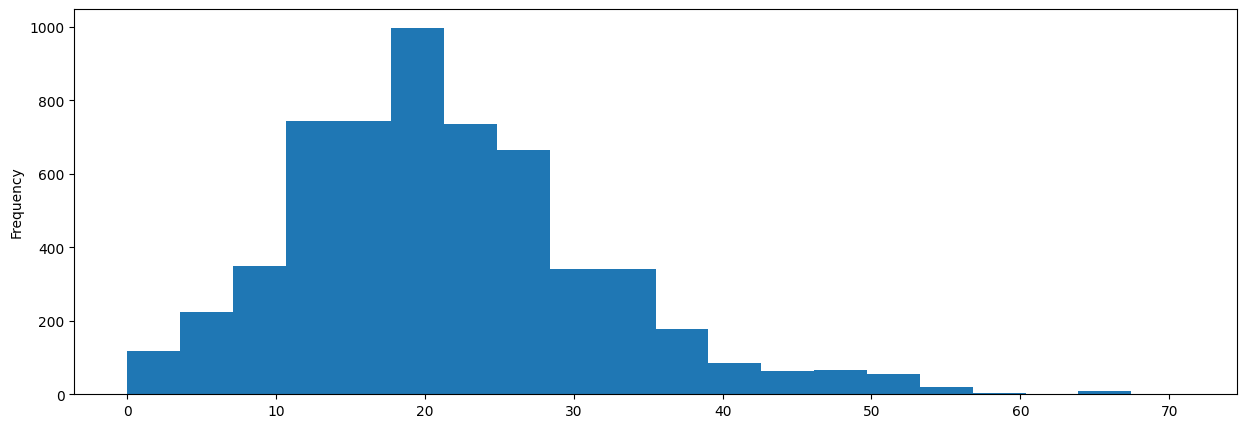

In [169]:
df["CLNO"].plot.hist(bins = 20,figsize=(15,5))

# This distribution looks good and we need not modify anything here.

<Axes: ylabel='Frequency'>

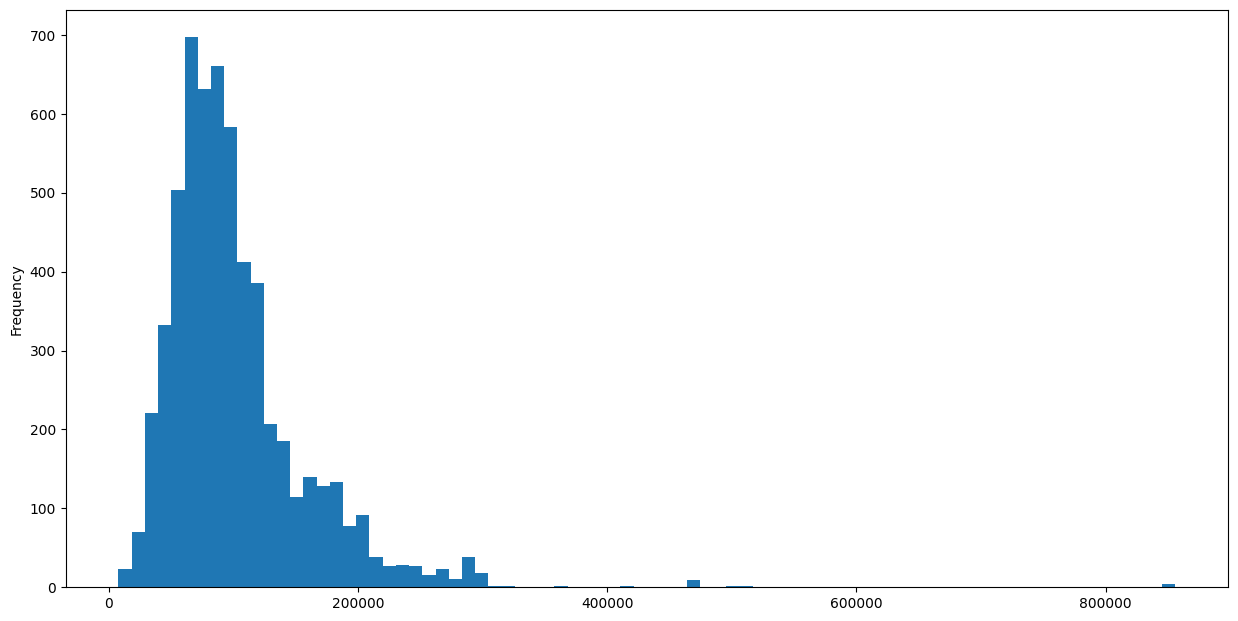

In [170]:
df["VALUE"].plot.hist(bins = 80,figsize=(15,7.5))

# Concentration is high around 80000-100000
# There are very less values at the end(>= 400000) that are a bit high compared to mean. We can cap these off.

<Axes: ylabel='Frequency'>

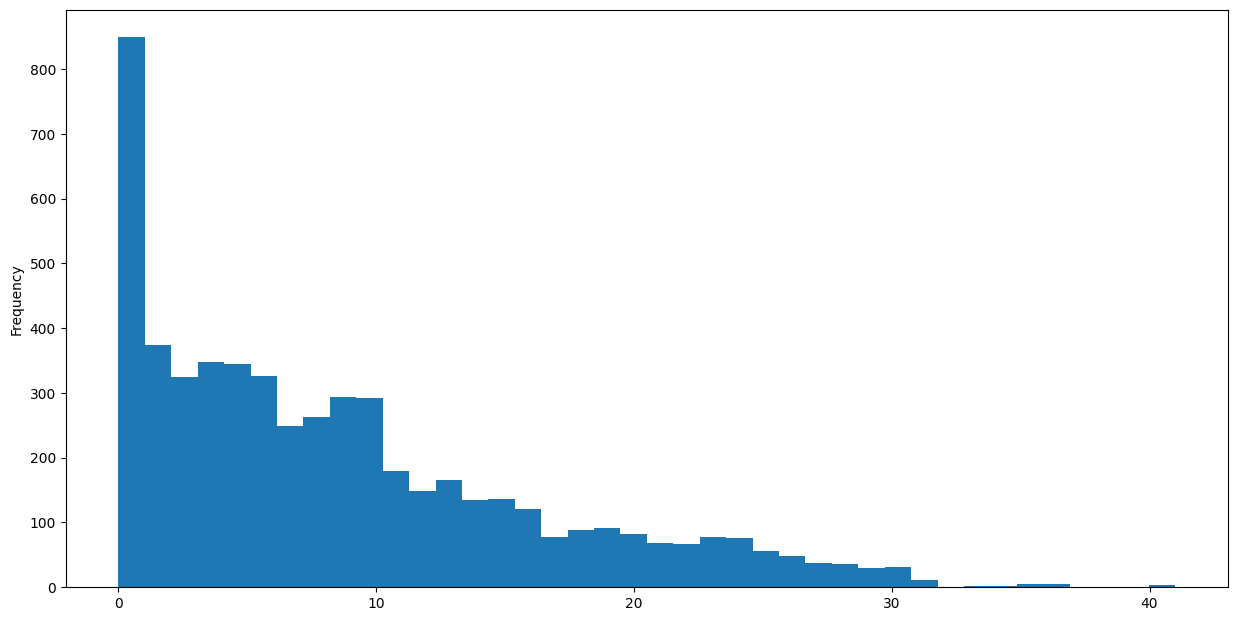

In [171]:
df["YOJ"].plot.hist(bins = 40,figsize=(15,7.5))

# This is very skewed. It would be better if we modify this variable to decrease the skewness.

In [172]:
df["DEROG"].value_counts()

# Derogatory incidents were reported only in few cases.
# So,creating a binary variable with values 1 for atleast one derogatory incident and 0 for no such report may be useful.

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [173]:
df["DELINQ"].value_counts()

# Most of them are zero.
# Same as in above case creating a binary variable would be useful

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

In [174]:
df["NINQ"].value_counts()

# Distributed mostly among first five values

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: NINQ, dtype: int64

In [5]:
# pre processing of numeric features

df["DEROG"] = df["DEROG"].fillna(0)
print(df["DEROG"].unique())

[ 0.  3.  2.  1.  4.  5.  6.  7.  8.  9. 10.]


In [6]:
df["DELINQ"] = df["DELINQ"].fillna(0)
print(df["DELINQ"].unique())

[ 0.  2.  1.  6. 15.  4.  3.  5.  7.  8. 10. 12. 11. 13.]


In [7]:
df.loc[df["CLAGE"]>=600,"CLAGE"] = 600
df.loc[df["VALUE"]>=400000,"VALUE"] = 400000

df.loc[df["DEBTINC"]>=100,"DEBTINC"] = 100

In [8]:
# Numeric features
# Replacement using median of each class
df["VALUE"] = df["VALUE"].fillna(df["VALUE"].median())
df["YOJ"] = df["YOJ"].fillna(df["YOJ"].median())
df["CLAGE"] = df["CLAGE"].fillna(df["CLAGE"].median())
df["NINQ"] = df["NINQ"].fillna(df["NINQ"].median())
df["CLNO"] = df["CLNO"].fillna(df["CLNO"].median())
df["DEBTINC"] = df["DEBTINC"].fillna(df["DEBTINC"].median())

In [9]:
df.isnull().sum()

# Checking if there is anything left out


BAD          0
LOAN         0
MORTDUE    518
VALUE        0
REASON       0
JOB          0
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

LABEL ENCODER

In [10]:
# label_encoder = preprocessing.LabelEncoder()
# df['JOB']= label_encoder.fit_transform(df['JOB'])
# df['REASON']= label_encoder.fit_transform(df['REASON'])
df = df.join(pd.get_dummies(df["JOB"]))
df = df.join(pd.get_dummies(df["REASON"]))
df.drop(["JOB","REASON"],axis=1,inplace=True)

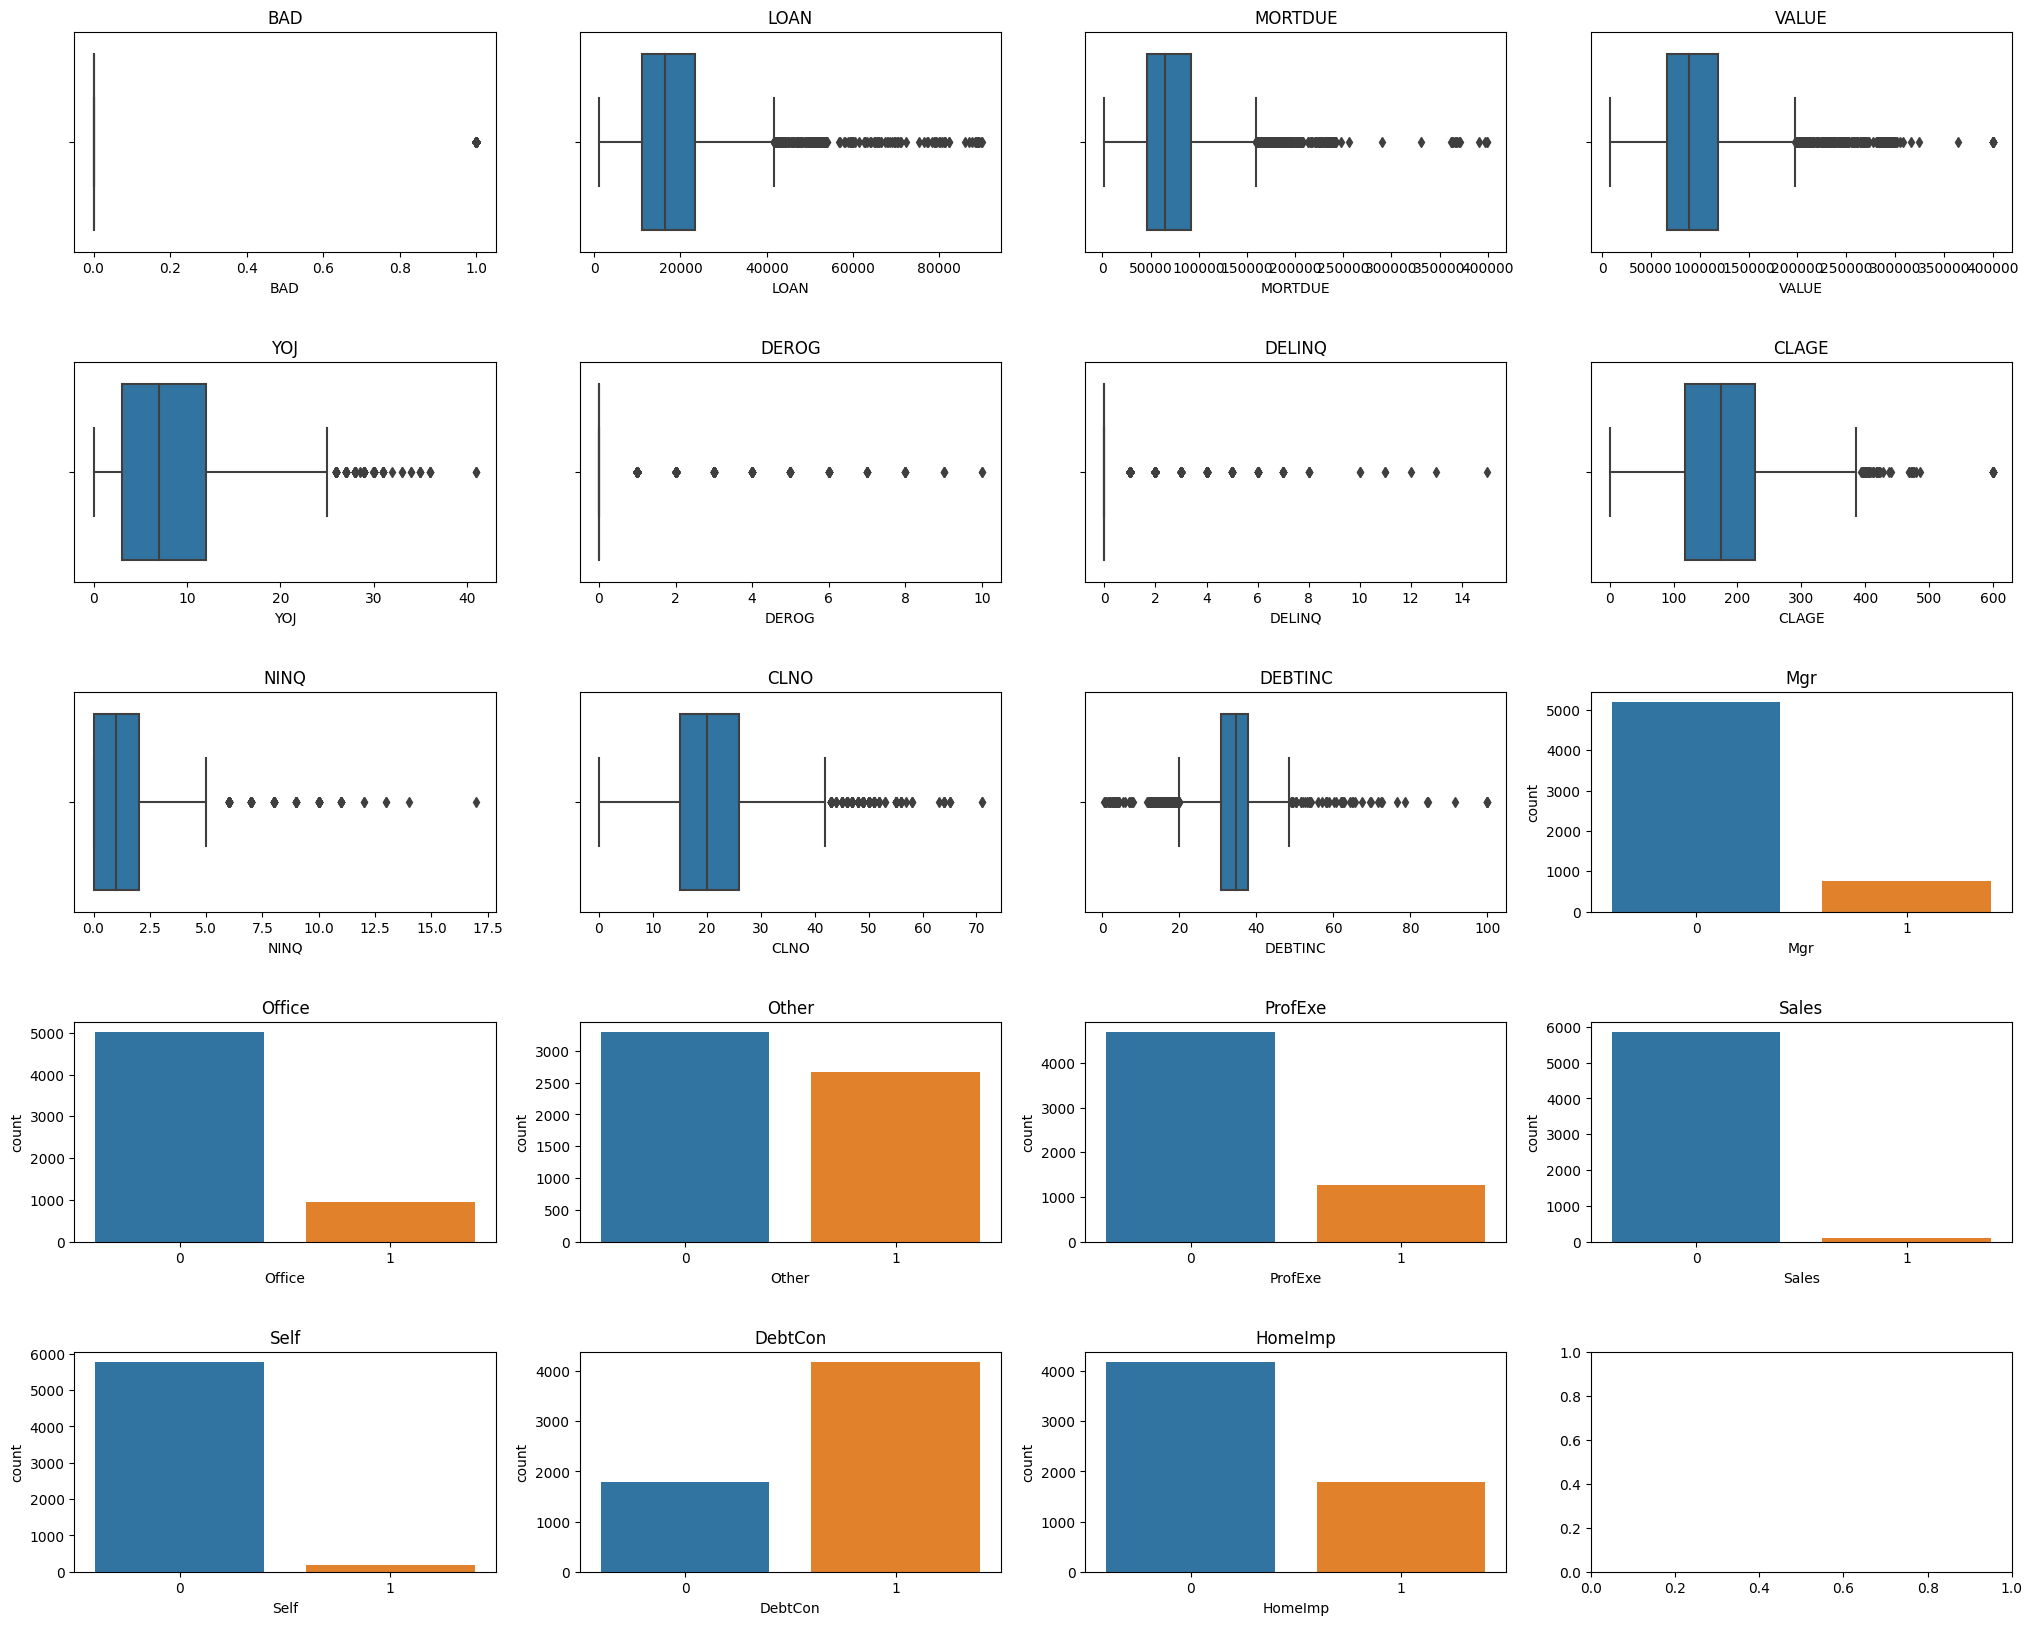

In [145]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for i, ax in zip(df.columns, axes.flat):
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        sns.boxplot(data=df, x=i, ax=ax)
    else:
        sns.countplot(data=df, x=i, ax=ax)  # Use countplot for non-numeric columns
    ax.set_title(i)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

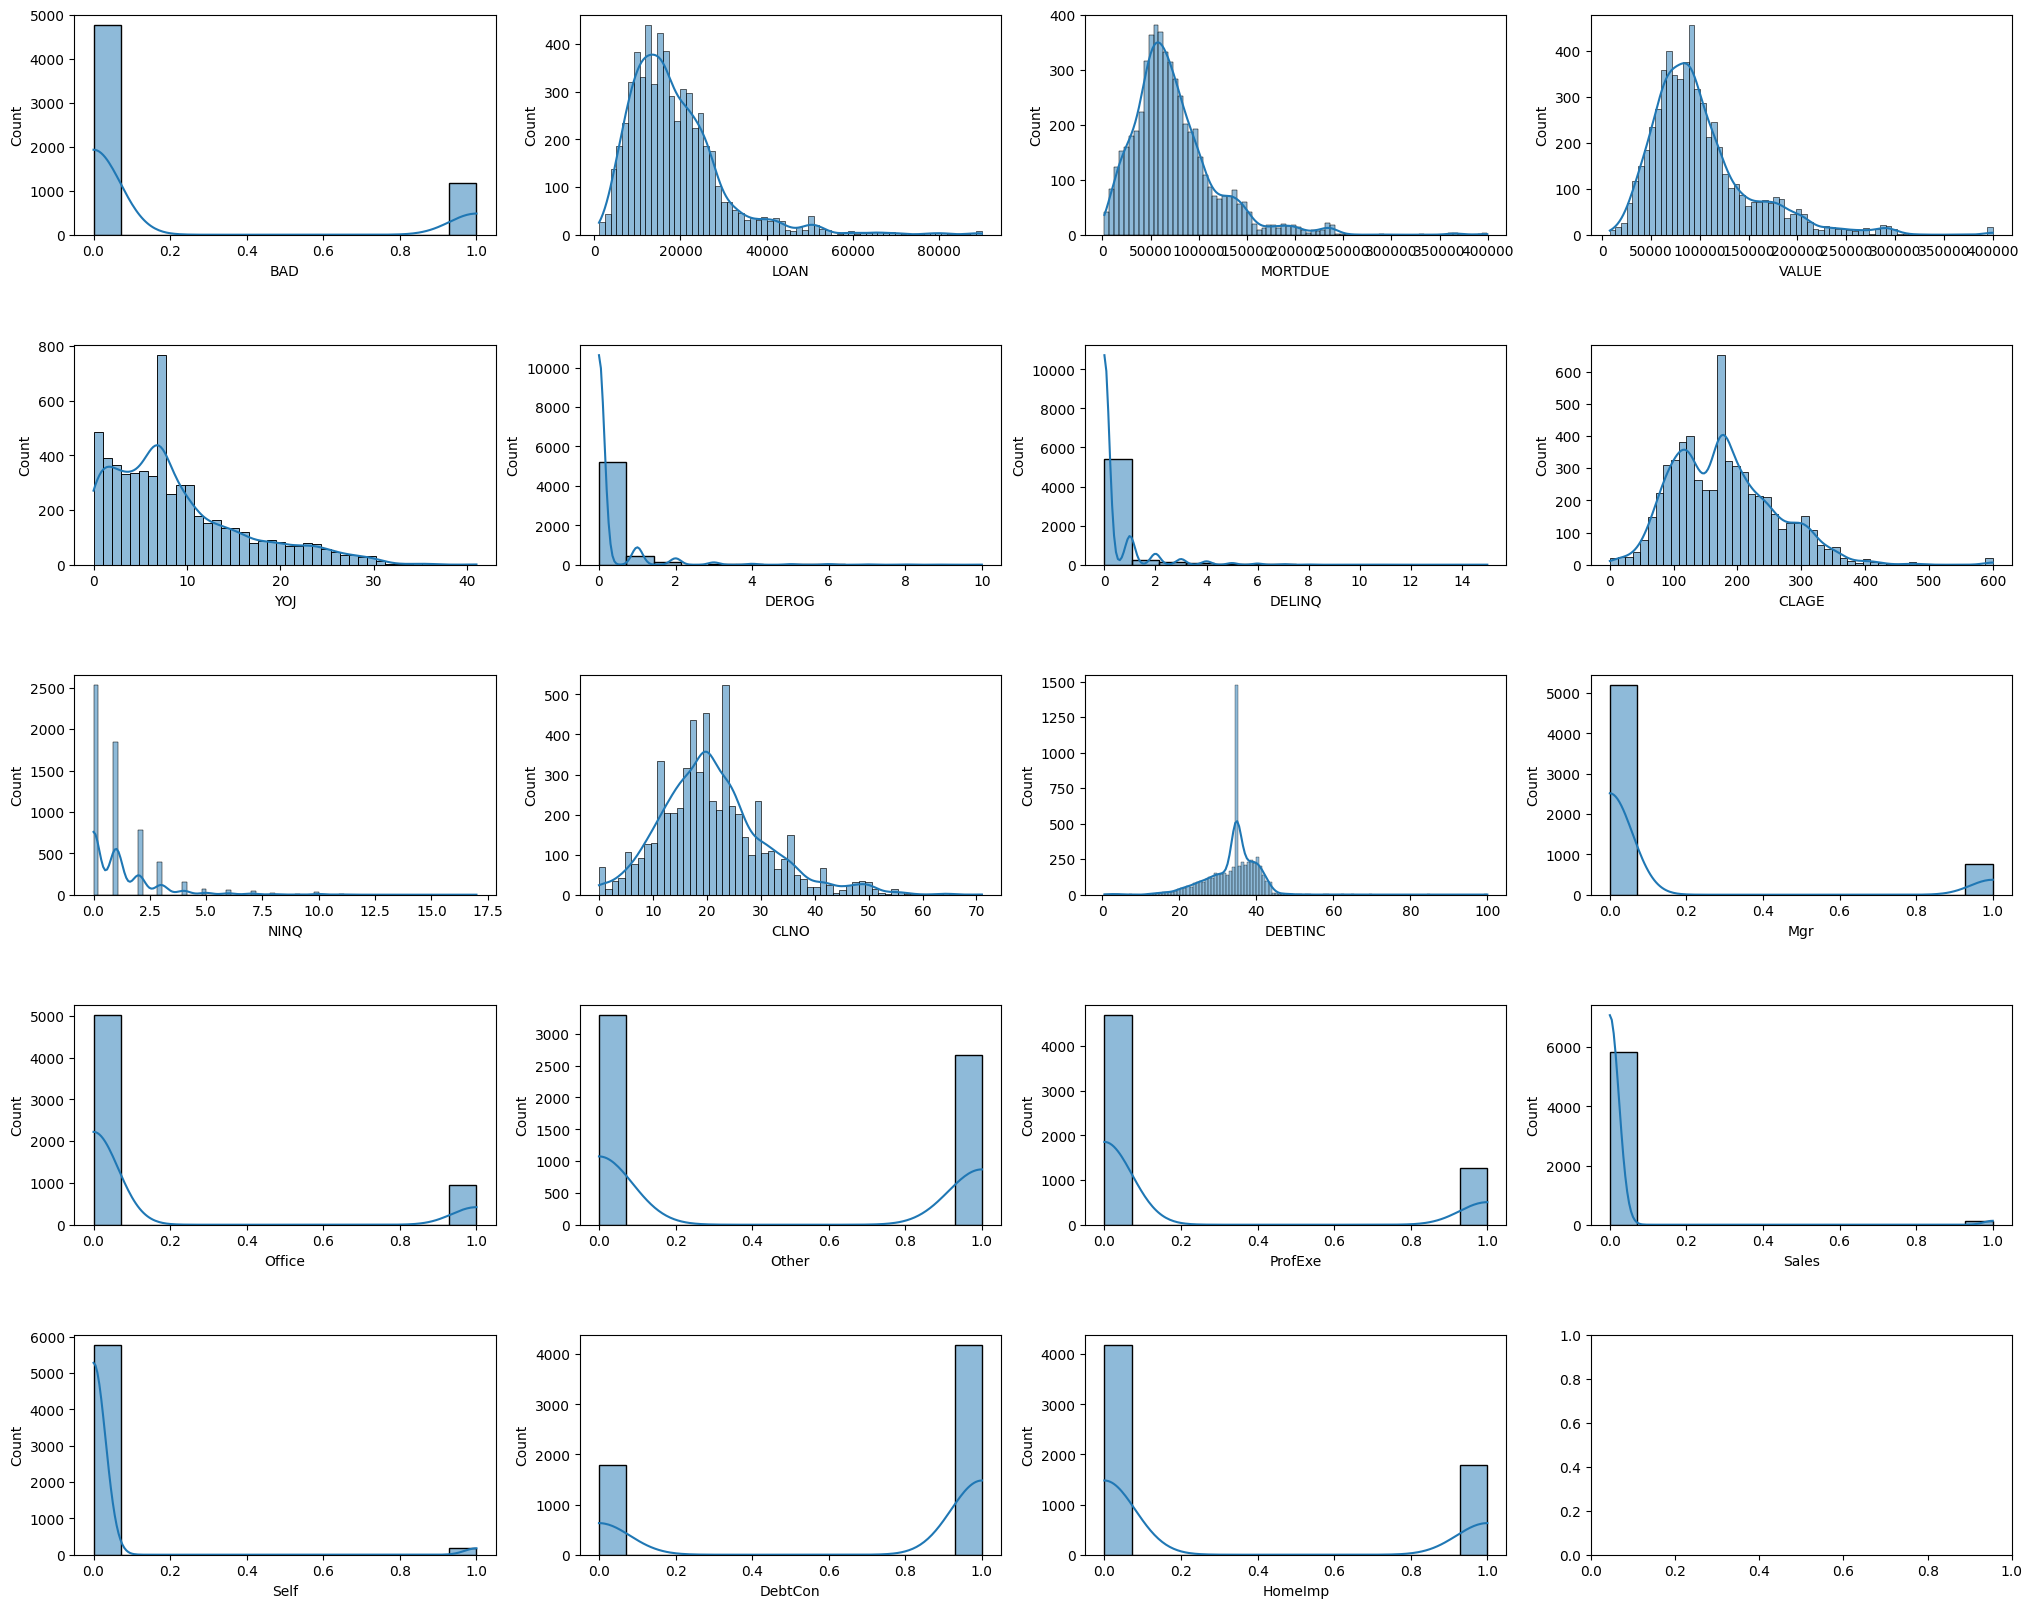

In [146]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    sns.histplot(data=df,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

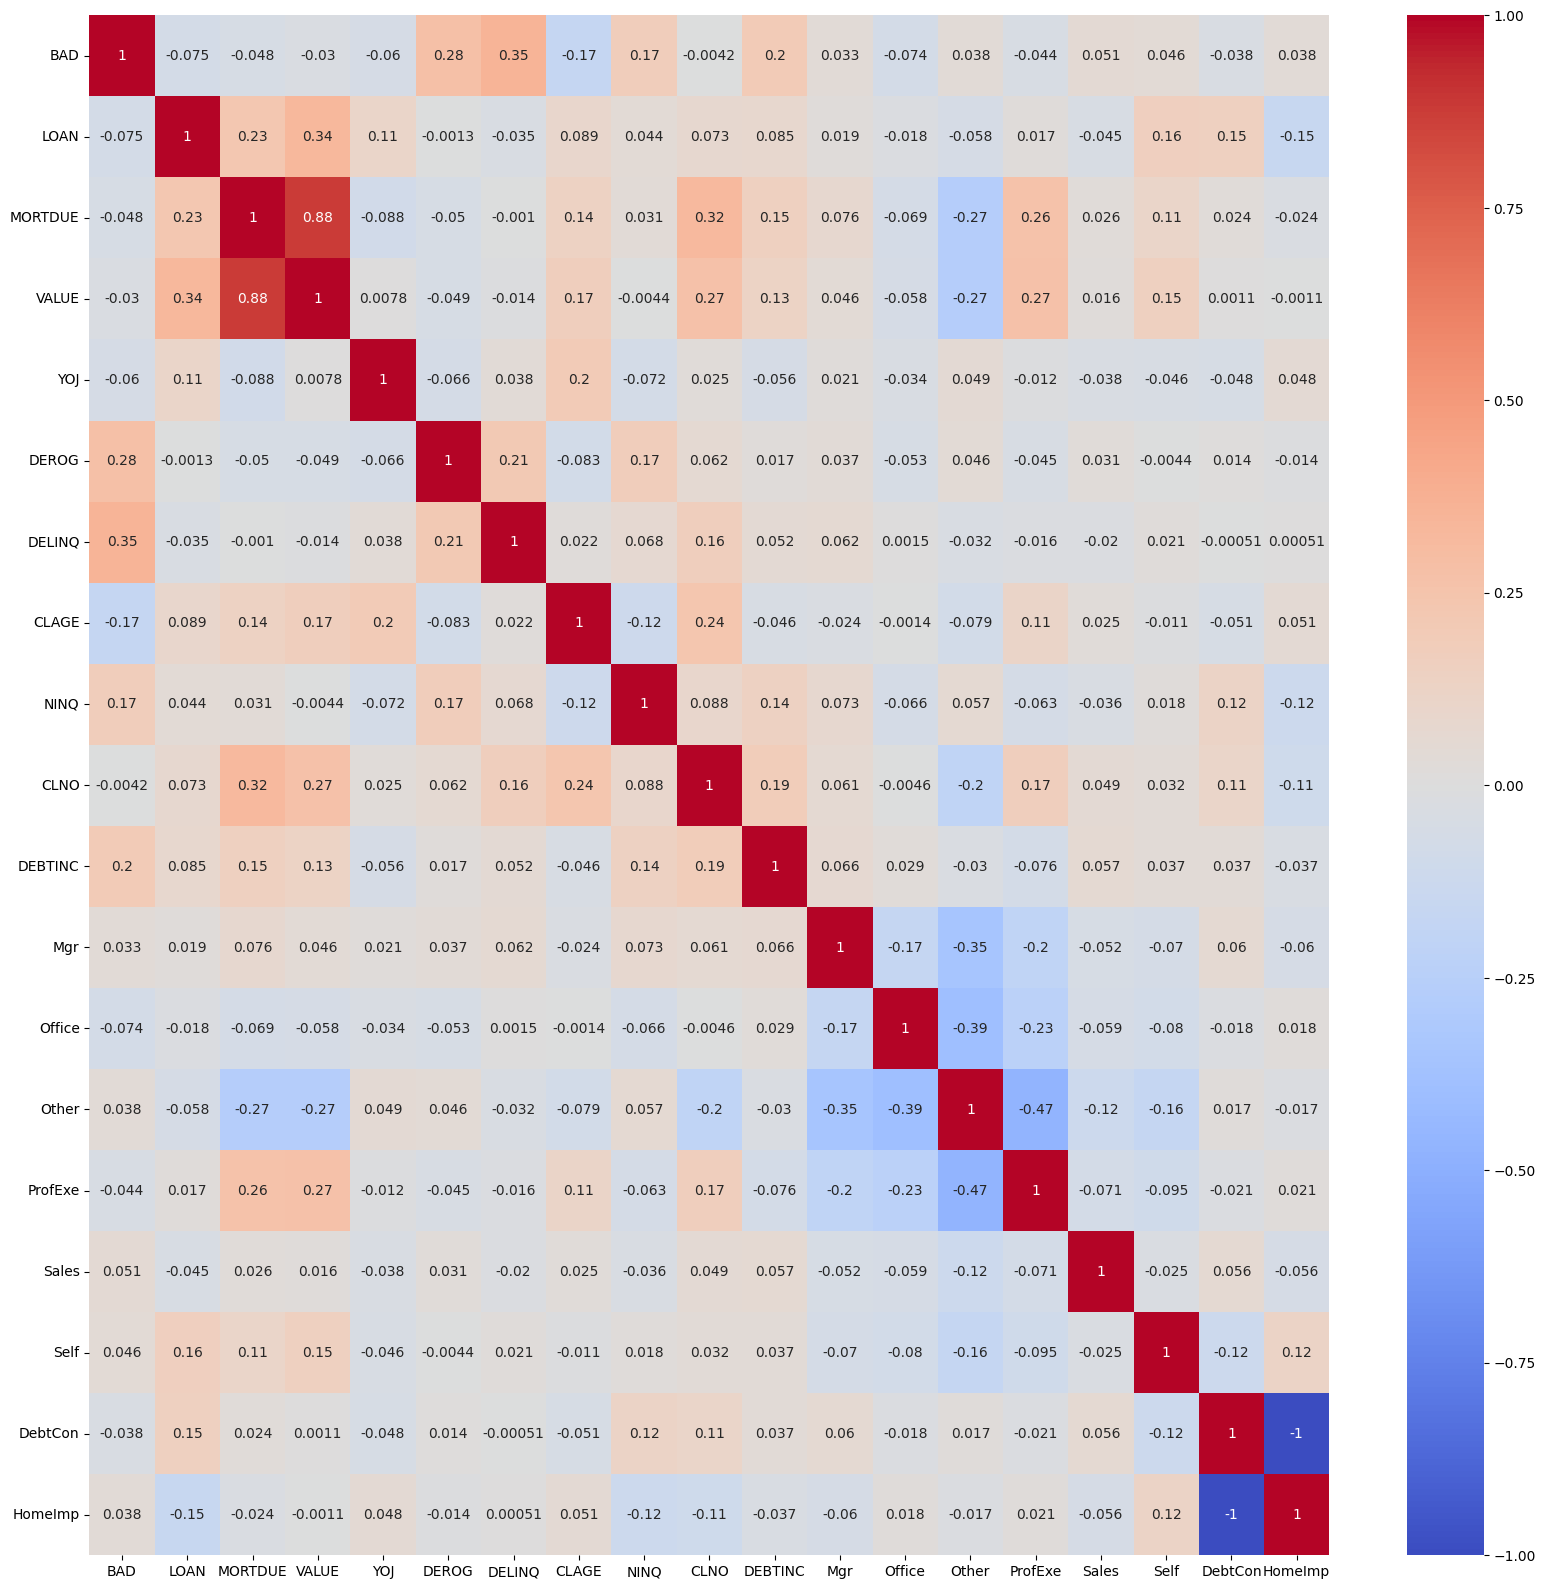

In [27]:

plt.figure(figsize=(20, 20))
# Replace 'coolwarm' with the colormap of your choice (e.g., 'viridis', 'mako', 'cividis', etc.)
heat_map = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.show()

In [11]:
df.drop(["MORTDUE"], axis=1, inplace=True)
df.head()

,BAD,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,Sales,Self,DebtCon,HomeImp
0,1,1100,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,0,0,1,0,0,0,0,1
1,1,1300,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,0,0,1,0,0,0,0,1
2,1,1500,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,0,0,1,0,0,0,0,1
3,1,1500,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,1,0,0,0,1,0
4,0,1700,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,0,1,0,0,0,0,0,1


## feature transformation

In [12]:
# Creating new binary vaiables  DEROG,DELINQ

df["DEROG"] = (df["DEROG"]>=1)*1
df["DELINQ"] = (df["DELINQ"]>=1)*1

In [13]:
# We need to decrease the skewness of the feature YOJ

df["YOJ"] = df["YOJ"].apply(lambda t : np.log(t+1))

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    sns.histplot(data=df,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [14]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print(y)

[1 1 1 ... 0 0 0]


Split the df into the training and test set


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, stratify=y, random_state = 42)

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from time import time
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pre = logreg.predict(X_test)
a1 = accuracy_score(y_test,y_pre)
f1 = f1_score(y_test, y_pre, average="macro")
p1 = precision_score(y_test, y_pre, average="macro")
r1 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()


plt.show()

accuracy score :  0.822986577181208
f1 score :  0.645864984546933
precision score :  0.7326424481836138
recall score :  0.6229454045769252


<Figure size 640x480 with 0 Axes>

In [36]:
# Decision Tree classifier using feat1


clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a2 = accuracy_score(y_test,y_pre)
f2 = f1_score(y_test, y_pre, average="macro")
p2 = precision_score(y_test, y_pre, average="macro")
r2 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()



plt.show()

accuracy score :  0.8582214765100671
f1 score :  0.7778412505858676
precision score :  0.7782821923255352
recall score :  0.777403414195867



<Figure size 640x480 with 0 Axes>

In [37]:
clf_tree=RandomForestClassifier()

clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a3 = accuracy_score(y_test,y_pre)
f3 = f1_score(y_test, y_pre, average="macro")
p3 = precision_score(y_test, y_pre, average="macro")
r3 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()



plt.show()

accuracy score :  0.9110738255033557
f1 score :  0.8468237804286685
precision score :  0.8912196714176912
recall score :  0.8167292074062329



<Figure size 640x480 with 0 Axes>

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
clf_tree=SVC()

clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a4 = accuracy_score(y_test,y_pre)
f4 = f1_score(y_test, y_pre, average="macro")
p4 = precision_score(y_test, y_pre, average="macro")
r4 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()



plt.show()

accuracy score :  0.8674496644295302
f1 score :  0.7379199020344549
precision score :  0.857358031021664
recall score :  0.6964483906770256



<Figure size 640x480 with 0 Axes>

In [39]:
clf_tree=GradientBoostingClassifier()
clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a5 = accuracy_score(y_test,y_pre)
f5 = f1_score(y_test, y_pre, average="macro")
p5 = precision_score(y_test, y_pre, average="macro")
r5 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()



plt.show()

accuracy score :  0.8917785234899329
f1 score :  0.8125326886431881
precision score :  0.8558377958053682
recall score :  0.7841771928897345



<Figure size 640x480 with 0 Axes>

In [40]:
clf_tree=AdaBoostClassifier()
clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a6 = accuracy_score(y_test,y_pre)
f6 = f1_score(y_test, y_pre, average="macro")
p6 = precision_score(y_test, y_pre, average="macro")
r6 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()



plt.show()


accuracy score :  0.8959731543624161
f1 score :  0.8234428454025954
precision score :  0.8570858283433134
recall score :  0.799411588534785



<Figure size 640x480 with 0 Axes>

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf_tree=KNeighborsClassifier()
clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a7 = accuracy_score(y_test,y_pre)
f7 = f1_score(y_test, y_pre, average="macro")
p7 = precision_score(y_test, y_pre, average="macro")
r7 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a7)
print("f1 score : ",f7)
print("precision score : ",p7)
print("recall score : ",r7)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()



plt.show()


accuracy score :  0.8791946308724832
f1 score :  0.7665542378413666
precision score :  0.8764704130557789
recall score :  0.7227066927399891



<Figure size 640x480 with 0 Axes>

In [42]:
clf_tree=XGBClassifier()
clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a8 = accuracy_score(y_test,y_pre)
f8 = f1_score(y_test, y_pre, average="macro")
p8 = precision_score(y_test, y_pre, average="macro")
r8 = recall_score(y_test, y_pre, average="macro")
print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()



plt.show()

accuracy score :  0.9093959731543624
f1 score :  0.8456602742090952
precision score :  0.8835297109434601
recall score :  0.8188344520198017



<Figure size 640x480 with 0 Axes>

show all result in one table

In [48]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier','random forest classifier', 'SVC','Gradient boosting', 'Adaboost','KNN', 'XGboost'],
    'Accuracy Score': [a1,a2,a3,a4,a5,a6,a7,a8],
    'Recall Score' : [r1,r2,r3,r4,r5,r6,r7,r8],
    'F1 Score' : [f1,f2,f3,f4,f5,f6,f7,f8,],
    'Precision Score' : [p1,p2,p3,p4,p5,p6,p7,p8]
})

models_sorted = models.sort_values(by='Recall Score', ascending=False)
models_sorted

,Model,Accuracy Score,Recall Score,F1 Score,Precision Score
7,XGboost,0.909396,0.818834,0.845660,0.883530
2,random forest classifier,0.911074,0.816729,0.846824,0.891220
5,Adaboost,0.895973,0.799412,0.823443,0.857086
4,Gradient boosting,0.891779,0.784177,0.812533,0.855838
1,Decision Tree Classifier,0.858221,0.777403,0.777841,0.778282
6,KNN,0.879195,0.722707,0.766554,0.876470
3,SVC,0.867450,0.696448,0.737920,0.857358
0,Logistic Regression,0.822987,0.622945,0.645865,0.732642


compare with trasholds

In [61]:
classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

# Generate predicted probabilities for the test data
probabilities = classifier.predict_proba(X_test)[:, 1]

# Loop through different threshold values and evaluate performance
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    y_pred = (probabilities >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Threshold: {threshold:.1f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("-------------------------")

Threshold: 0.1
Precision: 0.6809
Recall: 0.8697
F1 Score: 0.7638
Confusion Matrix:
[[857  97]
 [ 31 207]]
-------------------------
Threshold: 0.2
Precision: 0.7577
Recall: 0.8277
F1 Score: 0.7912
Confusion Matrix:
[[891  63]
 [ 41 197]]
-------------------------
Threshold: 0.3
Precision: 0.8089
Recall: 0.7647
F1 Score: 0.7862
Confusion Matrix:
[[911  43]
 [ 56 182]]
-------------------------
Threshold: 0.4
Precision: 0.8186
Recall: 0.7017
F1 Score: 0.7557
Confusion Matrix:
[[917  37]
 [ 71 167]]
-------------------------
Threshold: 0.5
Precision: 0.8457
Recall: 0.6681
F1 Score: 0.7465
Confusion Matrix:
[[925  29]
 [ 79 159]]
-------------------------
Threshold: 0.6
Precision: 0.8757
Recall: 0.6218
F1 Score: 0.7273
Confusion Matrix:
[[933  21]
 [ 90 148]]
-------------------------
Threshold: 0.7
Precision: 0.8889
Recall: 0.5714
F1 Score: 0.6957
Confusion Matrix:
[[937  17]
 [102 136]]
-------------------------
Threshold: 0.8
Precision: 0.9173
Recall: 0.5126
F1 Score: 0.6577
Confusion M

In [77]:
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")




#     # Eksen etiketlerini ayarlama
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted values")
# plt.ylabel("Actual Values")

#     # Grafiği gösterme
# plt.show()
# print()
#          # ROC Curve
# fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

#     # Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
# plt.figure()
# plt.step(recall, precision, color='b', alpha=0.2, where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Precision-Recall Curve')
# plt.show()

print()

take best parameter by making grid search

In [119]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create your XGBoost classifier
classifier = xgb.XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best Accuracy: 0.9161100001979845


check whether there is a overfitting or not

In [80]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score




# Define the best hyperparameters
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 300,
    'subsample': 1.0
}

# Create an XGBoost classifier with the best hyperparameters
best_classifier = xgb.XGBClassifier(**best_params)

# Calculate training accuracy using k-fold cross-validation
k = 5  # Number of folds
train_scores = cross_val_score(best_classifier, X_train, y_train, cv=k, scoring='accuracy')

# Calculate average training accuracy and standard deviation
average_train_accuracy = np.mean(train_scores)
std_train_accuracy = np.std(train_scores)

# Train the XGBoost classifier on the full training data
best_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_classifier.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Average Training Accuracy (k-fold CV): {average_train_accuracy:.4f}")
print(f"Standard Deviation of Training Accuracy: {std_train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Average Training Accuracy (k-fold CV): 0.9096
Standard Deviation of Training Accuracy: 0.0066
Test Accuracy: 0.9136


apply best trashold and best parameter

Threshold: 0.1
Precision: 0.6595
Recall: 0.9208
F1 Score: 0.7685
Confusion Matrix:
[[801 126]
 [ 21 244]]


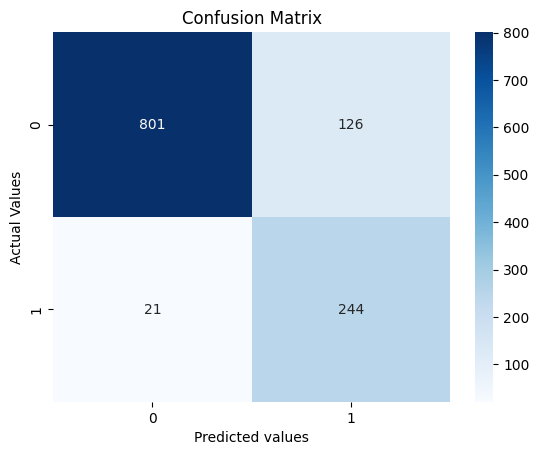

In [73]:
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 300,
    'subsample': 1.0
}

# Create an XGBoost classifier with the best hyperparameters
best_classifier = xgb.XGBClassifier(**best_params)

# Train the XGBoost classifier on the training data
best_classifier.fit(X_train, y_train)

# Define the threshold for prediction
threshold = 0.1

# Make predictions on the test data with the specified threshold
probabilities = best_classifier.predict_proba(X_test)[:, 1]
y_pred = (probabilities >= threshold).astype(int)

# Evaluate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print performance metrics and confusion matrix
print(f"Threshold: {threshold:.1f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion)
# Eksen etiketlerini ayarlama
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")

    # Grafiği gösterme
plt.show()
print()

# Train the XGBoost classifier on the full training data and load it

In [78]:
import joblib


best_classifier.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'xgboost_model.pkl'
joblib.dump(best_classifier, model_filename)

['xgboost_model.pkl']

In [79]:
loaded_model = joblib.load('xgboost_model.pkl')